In [1]:
#import libraries
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Embedding, Flatten, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

from sklearn.utils import shuffle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!wget -nc http://files.grouplens.org/datasets/movielens/ml-20m.zip


--2023-11-07 13:35:11--  http://files.grouplens.org/datasets/movielens/ml-20m.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 198702078 (189M) [application/zip]
Saving to: ‘ml-20m.zip’

ml-20m.zip          100%[===================>] 189.50M  72.8MB/s    in 2.6s    

2023-11-07 13:35:14 (72.8 MB/s) - ‘ml-20m.zip’ saved [198702078/198702078]



In [3]:
!unzip -n ml-20m.zip

Archive:  ml-20m.zip
   creating: ml-20m/
  inflating: ml-20m/genome-scores.csv  
  inflating: ml-20m/genome-tags.csv  
  inflating: ml-20m/links.csv        
  inflating: ml-20m/movies.csv       
  inflating: ml-20m/ratings.csv      
  inflating: ml-20m/README.txt       
  inflating: ml-20m/tags.csv         


In [4]:
!ls

ml-20m	ml-20m.zip  sample_data


In [5]:
df = pd.read_csv('ml-20m/ratings.csv')

In [6]:
df.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [7]:
df.userId = pd.Categorical(df.userId)
df['new_user_id'] = df.userId.cat.codes

In [8]:
df.movieId =pd.Categorical(df.movieId)
df['new_movie_id'] = df.movieId.cat.codes

In [9]:
df

,userId,movieId,rating,timestamp,new_user_id,new_movie_id
0,1,2,3.5,1112486027,0,1
1,1,29,3.5,1112484676,0,28
2,1,32,3.5,1112484819,0,31
3,1,47,3.5,1112484727,0,46
4,1,50,3.5,1112484580,0,49
...,...,...,...,...,...,...
20000258,138493,68954,4.5,1258126920,138492,13754
20000259,138493,69526,4.5,1259865108,138492,13862
20000260,138493,69644,3.0,1260209457,138492,13875
20000261,138493,70286,5.0,1258126944,138492,13993


In [ ]:
# Get user IDs, movie IDs, and ratings as seperate arrays
user_ids = df['new_user_id'].values
movie_ids = df['new_movie_id'].values
ratings = df['rating'].values

In [ ]:
# Get number of users and number of movies
N = len(set(user_ids))
M = len(set(movie_ids))

#set embedding dimension
K = 10

In [ ]:
# Make a neural network

# User input
u = Input(shape = (1,))

# Movie input
m = Input(shape = (1,))

# User embedding
u_emb = Embedding(N, K)(u)

# Movie embedding
m_emb = Embedding(M, K)(m)

#Flatten the embeddings
u_emb = Flatten()(u_emb)
m_emb = Flatten()(m_emb)

#Concatenate user-movie embeddings into a feature vector
x = Concatenate()([u_emb, m_emb])

x = Dense(1024, activation = 'relu')(x)
x = Dense(1)(x)

model = Model(inputs = [u, m], outputs = x)

In [ ]:
model.compile(loss = 'mse',
              optimizer = SGD(lr = 0.08, momentum = 0.9))

In [ ]:
# split the data
user_ids, movie_ids, ratings = shuffle(user_ids, movie_ids, ratings)
Ntrain = int(0.8 * len(ratings))
train_user = user_ids[:Ntrain]
train_movie = movie_ids[:Ntrain]
train_ratings = ratings[:Ntrain]

test_user = user_ids[Ntrain:]
test_movie = movie_ids[Ntrain:]
test_ratings = ratings[Ntrain:]

# center the ratings
avg_rating = train_ratings.mean()
train_ratings = train_ratings - avg_rating
test_ratings = test_ratings - avg_rating

In [ ]:
r = model.fit(
    x = [train_user, train_movie],
    y = train_ratings,
    epochs = 25,
    batch_size = 1024,
    verbose = 2,
    validation_data = ([test_user, test_movie], test_ratings)
)

Epoch 1/25
15626/15626 - 283s - loss: 0.8486 - val_loss: 0.7674 - 283s/epoch - 18ms/step
Epoch 2/25
15626/15626 - 251s - loss: 0.7481 - val_loss: 0.7416 - 251s/epoch - 16ms/step
Epoch 3/25
15626/15626 - 241s - loss: 0.7301 - val_loss: 0.7286 - 241s/epoch - 15ms/step
Epoch 4/25
15626/15626 - 241s - loss: 0.7141 - val_loss: 0.7143 - 241s/epoch - 15ms/step
Epoch 5/25
15626/15626 - 240s - loss: 0.6994 - val_loss: 0.7040 - 240s/epoch - 15ms/step
Epoch 6/25
15626/15626 - 241s - loss: 0.6888 - val_loss: 0.6993 - 241s/epoch - 15ms/step
Epoch 7/25
15626/15626 - 248s - loss: 0.6820 - val_loss: 0.6943 - 248s/epoch - 16ms/step
Epoch 8/25
15626/15626 - 240s - loss: 0.6773 - val_loss: 0.6914 - 240s/epoch - 15ms/step
Epoch 9/25
15626/15626 - 247s - loss: 0.6735 - val_loss: 0.6880 - 247s/epoch - 16ms/step
Epoch 10/25
15626/15626 - 248s - loss: 0.6695 - val_loss: 0.6862 - 248s/epoch - 16ms/step
Epoch 11/25
15626/15626 - 248s - loss: 0.6650 - val_loss: 0.6818 - 248s/epoch - 16ms/step
Epoch 12/25
15626/1

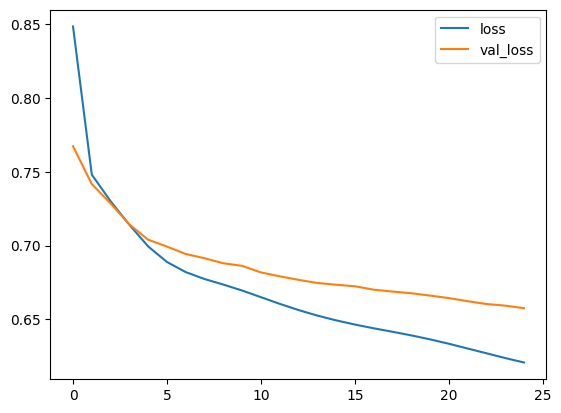

In [ ]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()